<a href="https://colab.research.google.com/github/M-Pascal/Heart_Disease_Detection_MLOP/blob/main/notebook/Heart_Disease_MLOP_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **=================MLOP SUMMATIVE=================**

# **Heart disease identification Using Different model**
This project aims to develop a machine learning model to predict the likelihood of heart disease, a leading global cause of disability and death. Heart disease encompasses various conditions affecting the heart and circulatory system, often leading to severe complications like heart attacks and organ damage.

In [2]:
# ============= Library Imports =============
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Import for neuron netword model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading dataset

In [4]:
# ============= Load Dataset =============
PATH = '/content/drive/MyDrive/Y3_T1/Final_Summative/dataset/heart.csv'
df = pd.read_csv(PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Data Preprocessing**

Renaming the column inorder to understand each features and re-assigning its encoded value in string.

In [5]:
## Renaming Columns for Better Readability
df = df.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_electrocardiogram',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia'
})

In [6]:
## Mapping Categorical Values
mapping_dicts = {
    'sex': {0: 'female', 1: 'male'},
    'chest_pain_type': {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'},
    'fasting_blood_sugar': {0: 'lower than 120mg/ml', 1: 'greater than 120mg/ml'},
    'resting_electrocardiogram': {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'},
    'exercise_induced_angina': {0: 'no', 1: 'yes'},
    'st_slope': {0: 'upsloping', 1: 'flat', 2: 'downsloping'},
    'thalassemia': {1: 'fixed defect', 2: 'normal', 3: 'reversible defect'}
}

for col, mapping in mapping_dicts.items():
    df[col] = df[col].replace(mapping)

In [7]:
# Changes after renaming
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [8]:
## Handling Missing Values
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_electrocardiogram,0
max_heart_rate_achieved,0
exercise_induced_angina,0
st_depression,0


In [9]:
from sklearn.preprocessing import LabelEncoder # for encoder

## Encoding Categorical Variables
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({'yes': 1, 'no': 0})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({'greater than 120mg/ml': 1, 'lower than 120mg/ml': 0})
df['st_slope'] = df['st_slope'].map({'downsloping': 0, 'flat': 1, 'upsloping': 2})
df['thalassemia'] = df['thalassemia'].map({'normal': 0, 'fixed defect': 1, 'reversible defect': 2})

## Apply Label Encoding
label_encoders = {}
for col in ['chest_pain_type', 'resting_electrocardiogram']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# **Data visualization**

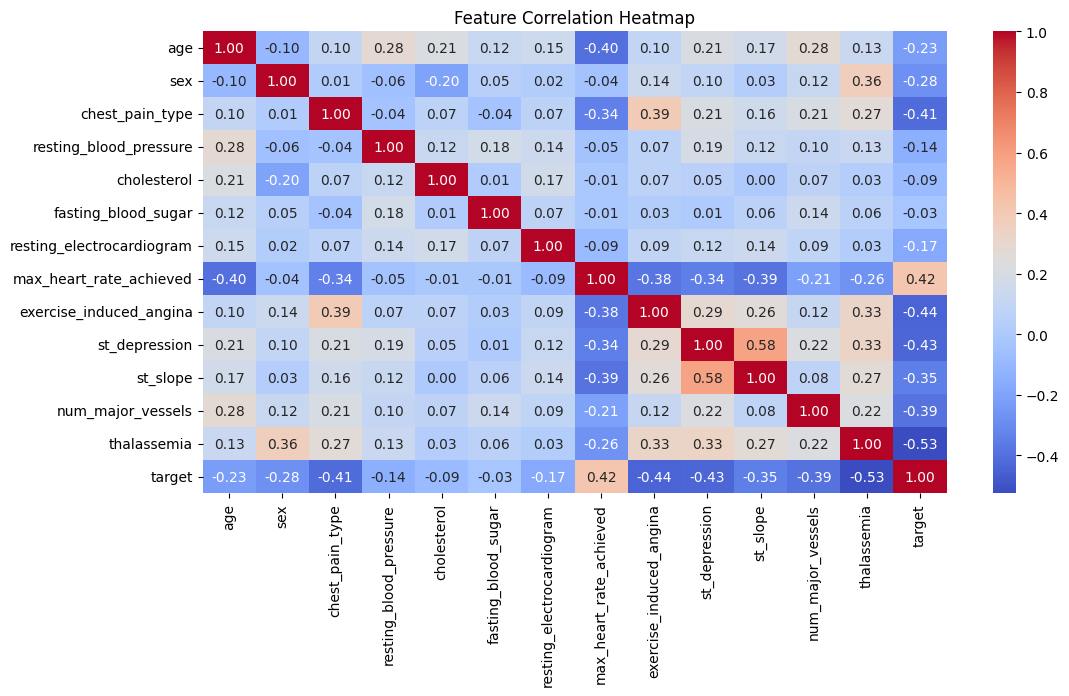

In [10]:
# ============= Data Visualization =============
## Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
# plt.xticks(rotation=45)
plt.show()


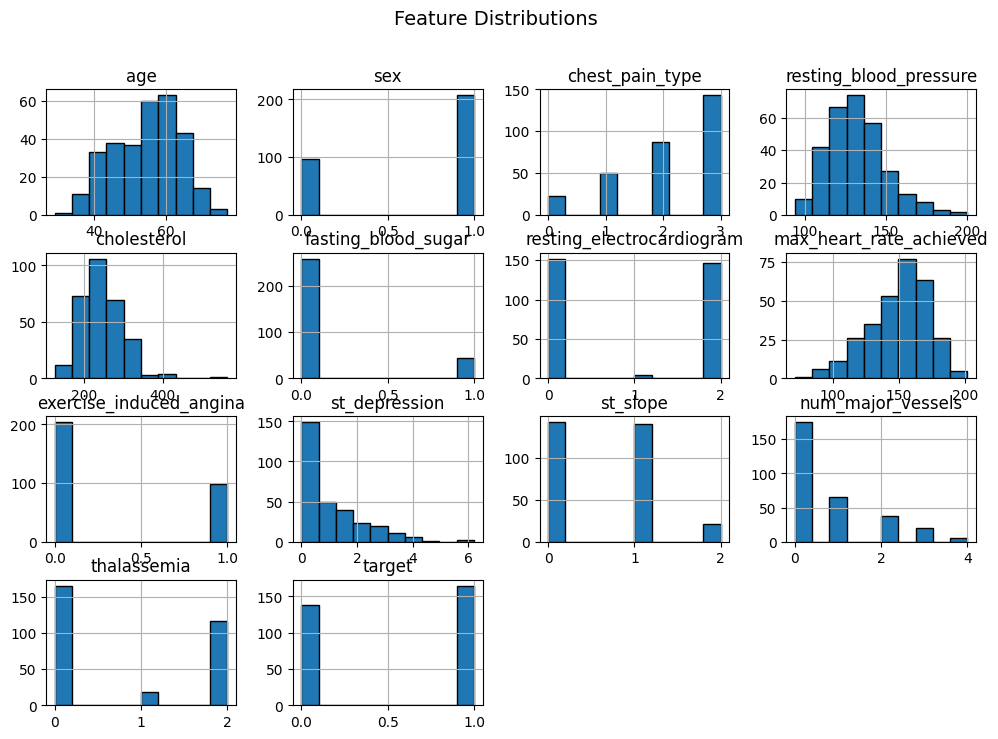

In [11]:
## Feature Distributions
df.hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()

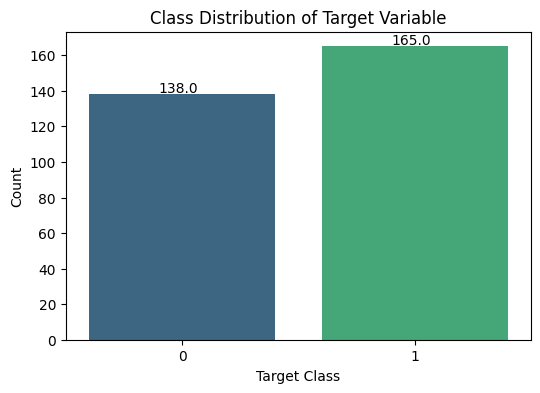

In [12]:
## Class Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', hue='target', palette='viridis', legend=False)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 1))
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Class Distribution of Target Variable')
plt.show()

In [13]:
# ============= Data Splitting & Saving =============
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['target'])
os.makedirs('data', exist_ok=True)
train_df.to_csv('data/train.csv', index=False)
test_df.to_csv('data/test.csv', index=False)
print('Datasets saved successfully in the "data" directory!')

Datasets saved successfully in the "data" directory!


# **Model Architecture**

In [14]:
## Load Train & Test Data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

X_train, y_train = train_df.drop('target', axis=1), train_df['target']
X_test, y_test = test_df.drop('target', axis=1), test_df['target']

In [15]:
## Handling Missing Values & Feature Scaling
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## *Section_1: Logistic regression model*

In [16]:
## Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [17]:
y_pred = log_reg.predict(X_test)

# Evaluate Logistic Regression
print('Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))


Logistic Regression Metrics:
Accuracy: 0.7802
Recall: 0.8200
F1 Score: 0.8039
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



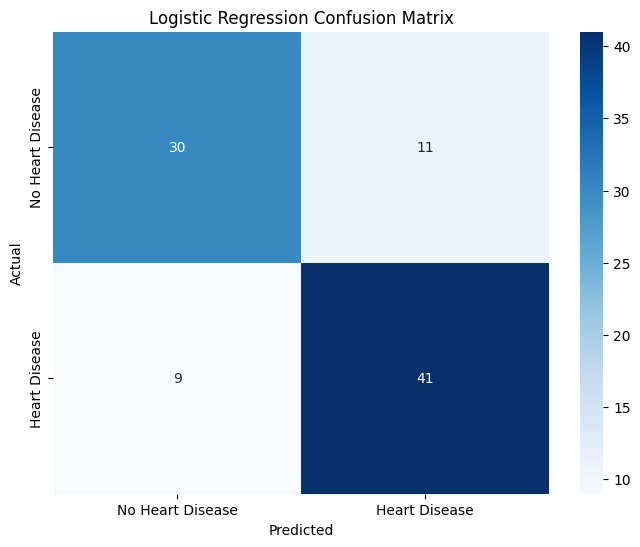

In [18]:
# Confusion Matrix Plot
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## *Section_2: random forest model*

In [19]:
## Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print('Random Forest Metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf):.4f}')
print(classification_report(y_test, y_pred_rf))


Random Forest Metrics:
Accuracy: 0.8132
Recall: 0.8800
F1 Score: 0.8381
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



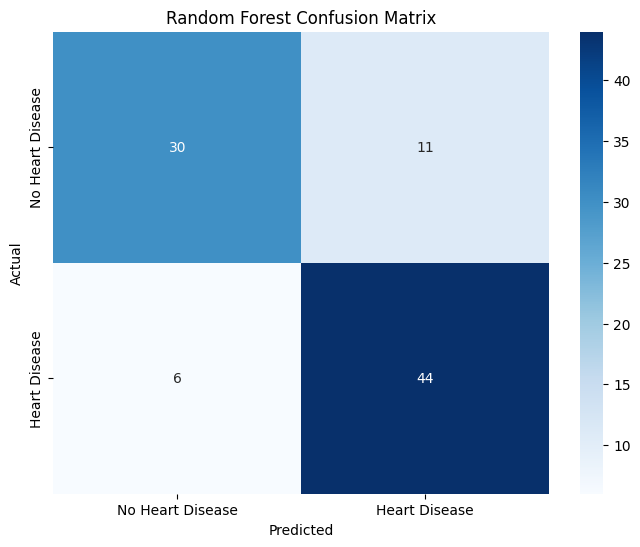

In [21]:
# Confusion Matrix Plot
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## *Section_3: Neuron Network model*

In [22]:
## Neural Network Model with L2 Regularization and Adam Optimizer
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.4730 - loss: 2.4515 - val_accuracy: 0.5275 - val_loss: 2.3821
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4953 - loss: 2.4392 - val_accuracy: 0.5604 - val_loss: 2.3262
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6025 - loss: 2.2963 - val_accuracy: 0.6044 - val_loss: 2.2737
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5518 - loss: 2.2752 - val_accuracy: 0.6813 - val_loss: 2.2250
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6560 - loss: 2.2038 - val_accuracy: 0.7143 - val_loss: 2.1794
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6276 - loss: 2.1790 - val_accuracy: 0.7473 - val_loss: 2.1346
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6857 - loss: 2.1427 - val_accuracy: 0.7363 - val_loss: 2.0904
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5870 - loss: 2.1293 - val_accuracy: 0.7582 - val_loss

In [24]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,565 (41.27 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,044 (27.52 KB)

In [25]:
# Evaluate Neural Network
nn_loss, nn_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Neural Network Accuracy: {nn_accuracy:.4f}')

Neural Network Accuracy: 0.7912


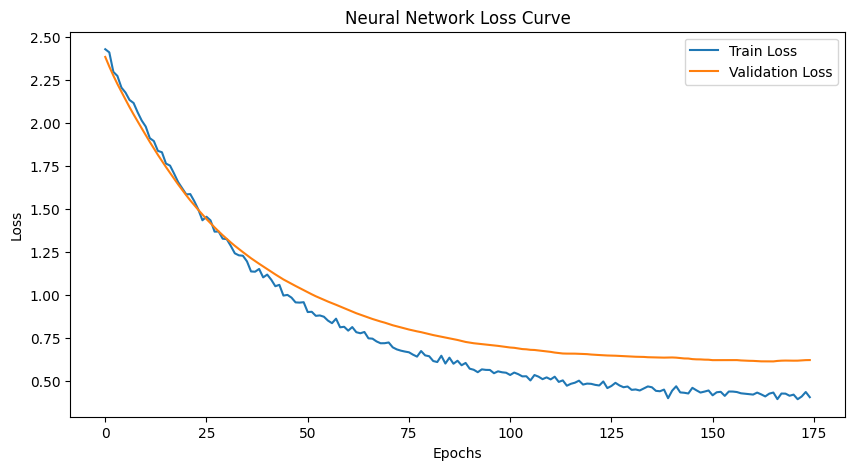

In [26]:
# ============= Plot Loss Curve =============
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Loss Curve')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


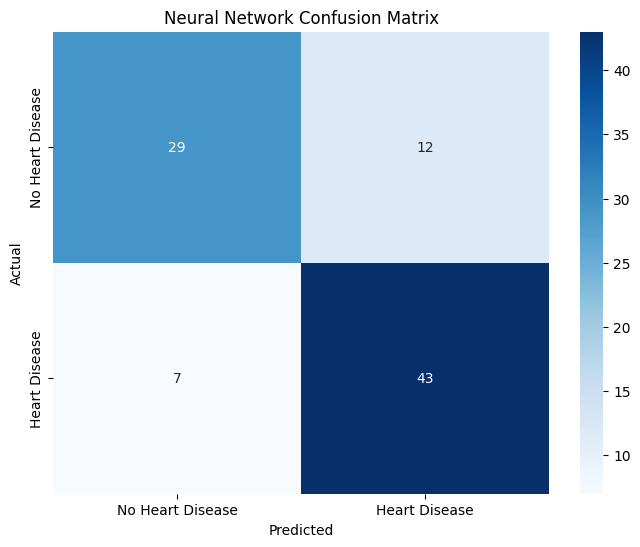

In [27]:
# Confusion Matrix for Neural Network
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Saving the model & saving zipped file

In [28]:
import os
import joblib
import shutil

In [33]:
# Create directory if not exists
os.makedirs("models", exist_ok=True)

# Save Logistic Regression model
joblib.dump(log_reg, "models/logistic_regression.pkl")

# Save Random Forest model
joblib.dump(rf_model, "models/random_forest.pkl")

# Save the encoders as a dictionary
joblib.dump(label_encoders, 'models/label_encoders.pkl')

# Save Neural Network model
model.save("models/model_NN.h5")

print("All models saved successfully!")


All models saved successfully!


In [30]:
# zipped file of data used (train, and test)
shutil.make_archive("data", 'zip', "data")
print("'data' directory zipped successfully!")


'data' directory zipped successfully!


In [31]:
# ======================================The End======================================